In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banking-dataset-classification/new_train.csv
/kaggle/input/banking-dataset-classification/new_test.csv


# Problem Statement:

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

The input variables consist of age, job/employment type, marital status, educational background, past credit default, present loan- housing or otherwise, contact details & past contact medium etc.

**Goal**:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)



In [7]:
df_train = pd.read_csv('/kaggle/input/banking-dataset-classification/new_train.csv')
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [8]:
df_test = pd.read_csv('/kaggle/input/banking-dataset-classification/new_test.csv')
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


# Hypothesis Generation

Below are some of the factors which can affect the long term deposit decisions of the prospects.

**1. Age**: Applicants who are in early career stage tend to invest more in long term plans

**2. Job**: There are certain job types which are high paying like services, management, entrepreuner etc.

**3. Marital Status**: Unmarried people will save extra with less expenditure compared to married people.

**4. Education**: High educated tend to have more job opportunities & hence can save more.

**5. Loan Defaulters**: Defaulters will have less money to save compared with non- defaulters.

**6. Present loan status**: People who have taken loan will save less for long term compared with people with no loans.

In [9]:
# Making a copy of train and test data so that even if we have to make any changes in these datasets we would not 
# lose the original datasets.

df_train_original = df_train.copy()
df_test_original = df_test.copy()

In [10]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [12]:
df_train.shape, df_test.shape

((32950, 16), (8238, 13))

In [13]:
# Checking the data types of the variables

df_train.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [14]:
## For categorical features we can use frequency table or bar plots which will calculate the number of each category 
# in a particular variable. For numerical features, probability density plots can be used to look at the distribution of 
# the variable

In [15]:
# Target variable analysis-
# Frequency table of a variable will give us the count of each category in that variable

df_train['y'].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

In [16]:
# # Normalize can be set to True to print proportions instead of number

df_train['y'].value_counts(normalize = True)

y
no     0.887344
yes    0.112656
Name: proportion, dtype: float64

<Axes: xlabel='y'>

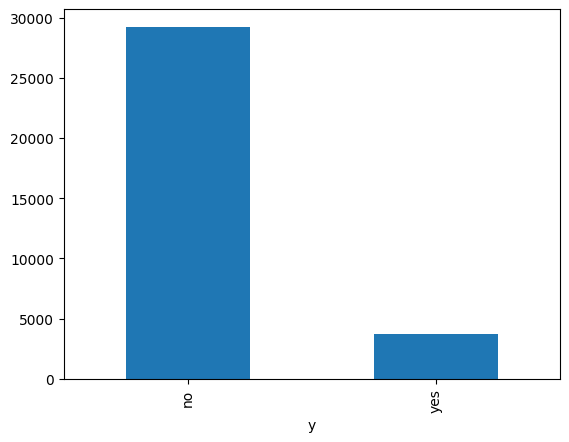

In [17]:
df_train['y'].value_counts().plot.bar()

In [18]:
# So out of all customers, approx. 11% (around 4000) people will chose for long term deposits.

# Independent/Input variable analysis(categorical)

following are the independent categorical variables
1. marital
2. default
3. housing
4. loan
5. contact
6. job
7. education
8. poutcome

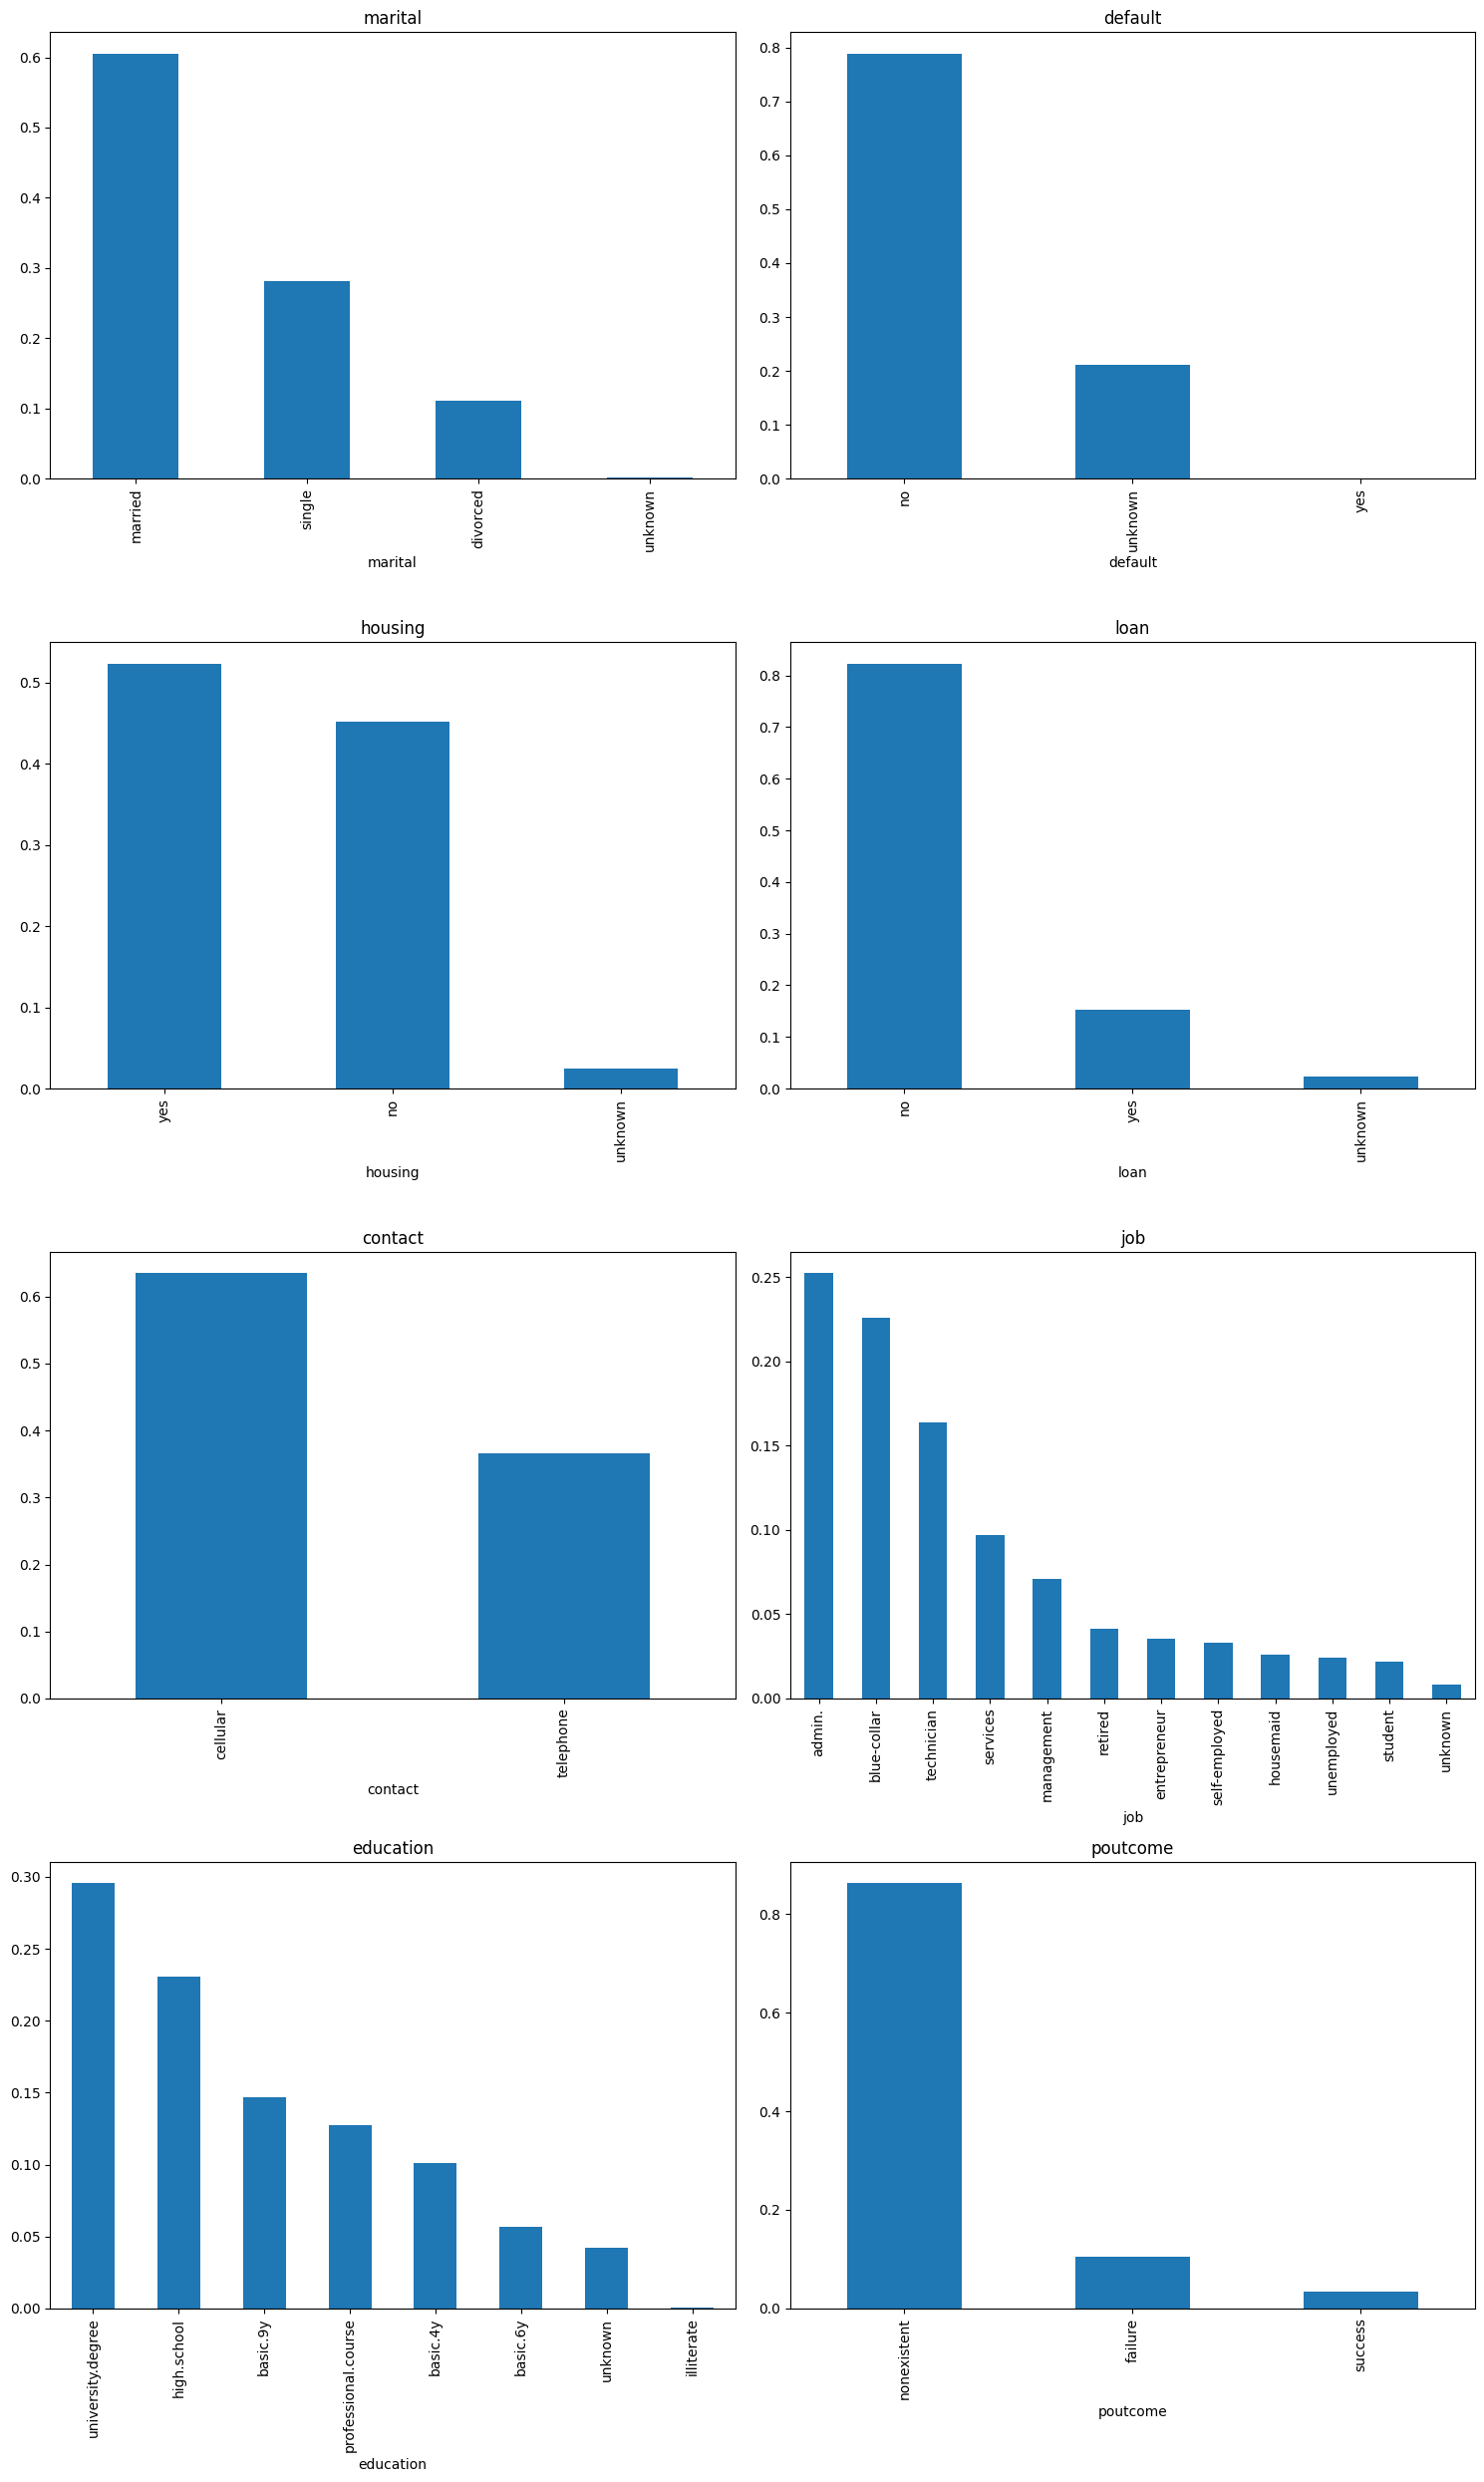

In [19]:
# Plotting all the categorical variables (In 4 x 2 matrix)

plt.figure(1)
plt.subplot(421)
df_train['marital'].value_counts(normalize= True).plot.bar(figsize = (15, 25), title = 'marital')

plt.subplot(422)
df_train['default'].value_counts(normalize= True).plot.bar(title = 'default')

plt.subplot(423)
df_train['housing'].value_counts(normalize= True).plot.bar(title = 'housing')

plt.subplot(424)
df_train['loan'].value_counts(normalize= True).plot.bar(title = 'loan')

plt.subplot(425)
df_train['contact'].value_counts(normalize= True).plot.bar(title = 'contact')

plt.subplot(426)
df_train['job'].value_counts(normalize= True).plot.bar(title = 'job')

plt.subplot(427)
df_train['education'].value_counts(normalize= True).plot.bar(title = 'education')

plt.subplot(428)
df_train['poutcome'].value_counts(normalize= True).plot.bar(title = 'poutcome')

plt.tight_layout()

**Following insights can be drawn from above visualization**

1. Around 60% of the applicants are married followed by singles(30%)
2. Majority (80%) applicants are non-defaulters.
3. Approx. 50% applicants have housing loans.
4. Majority applicants (80%) have no other loans.(Other than housing loan)
5. More than 60% of applicants have cellular phone as a contact reference.
6. Sizable chunck of applicants (> 50%) works in admin, blue-collared & technician jobs.
7. Around half of the applicants has at least high school or university degree.
8. Very less conversion rate from previous marketing campaign. Approx. 80% customer data shown to be non-existent, i.e. not contacted

# Independent/Input Variable Analysis (Ordinal)

following are the independent ordinal variables:

1. month
2. day_of_week

<Axes: title={'center': 'day_of_week'}, xlabel='day_of_week'>

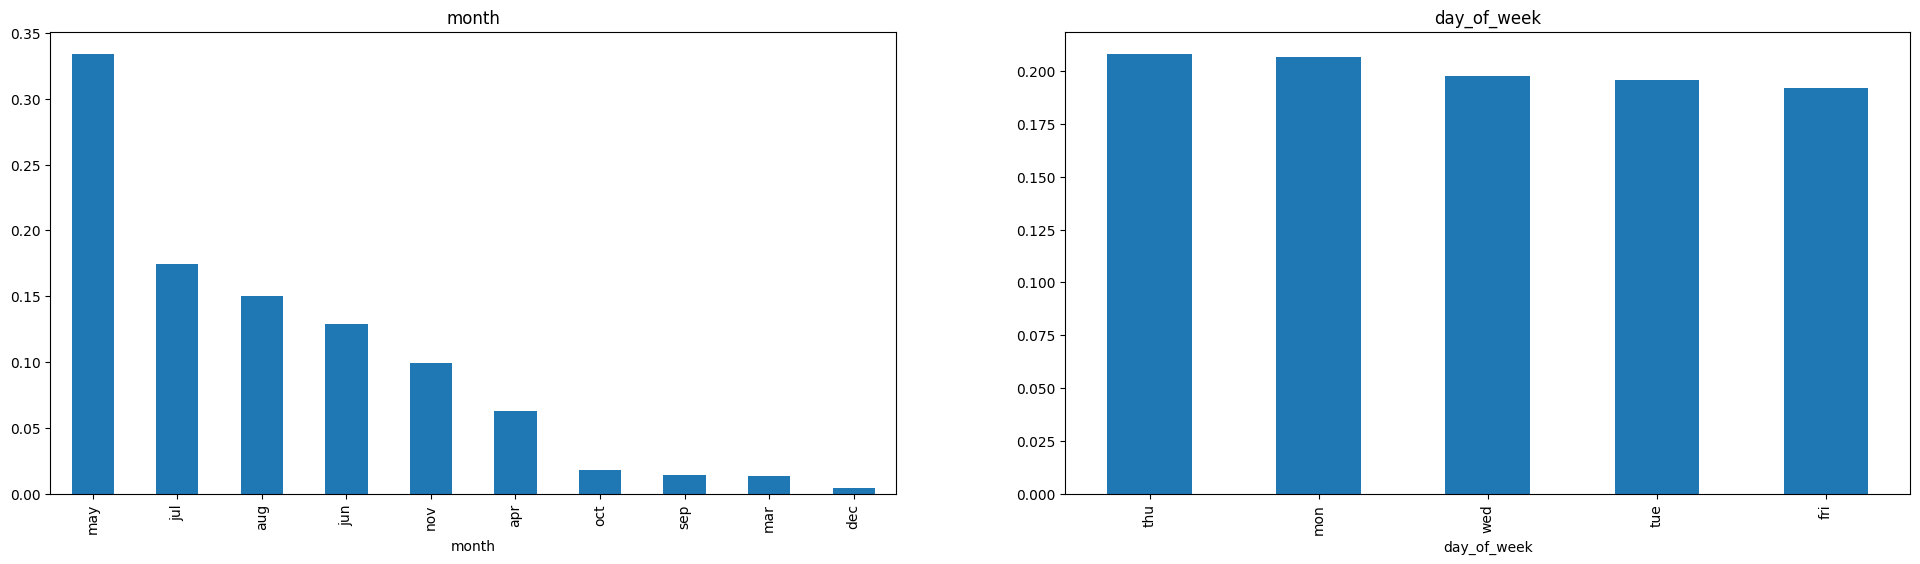

In [20]:
# Plotting all the ordinal variables (In 1 x 2 matrix)

plt.figure(1) 
plt.subplot(121) 
df_train['month'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'month')

plt.subplot(122) 
df_train['day_of_week'].value_counts(normalize=True).plot.bar(title= 'day_of_week') 

**Following insights can be drawn from above visualization**

1. Most of the contacts were made during the month of May, followed by July & August.
2. Contact frequency is approximately similar throughout the working week.

# Independent/Input Variable Analysis (Numerical)

1. age
2. duration
3. campaign
4. pdays
5. previous

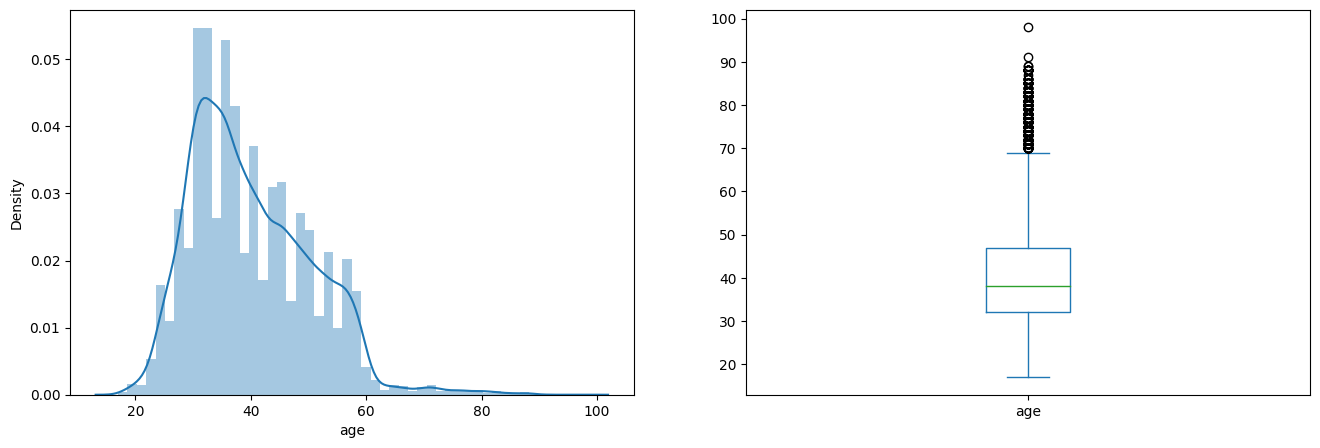

In [21]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['age']); 
plt.subplot(122) 
df_train['age'].plot.box(figsize=(16,5)) 
plt.show()

It's evident that most of the data in the distribution of age is slightly towards left which means it is not normally distributed.

Also there are lots of outliers in the age group. It can be attributed to the earning age of the applicants as most of the people save for long term during their earning period.

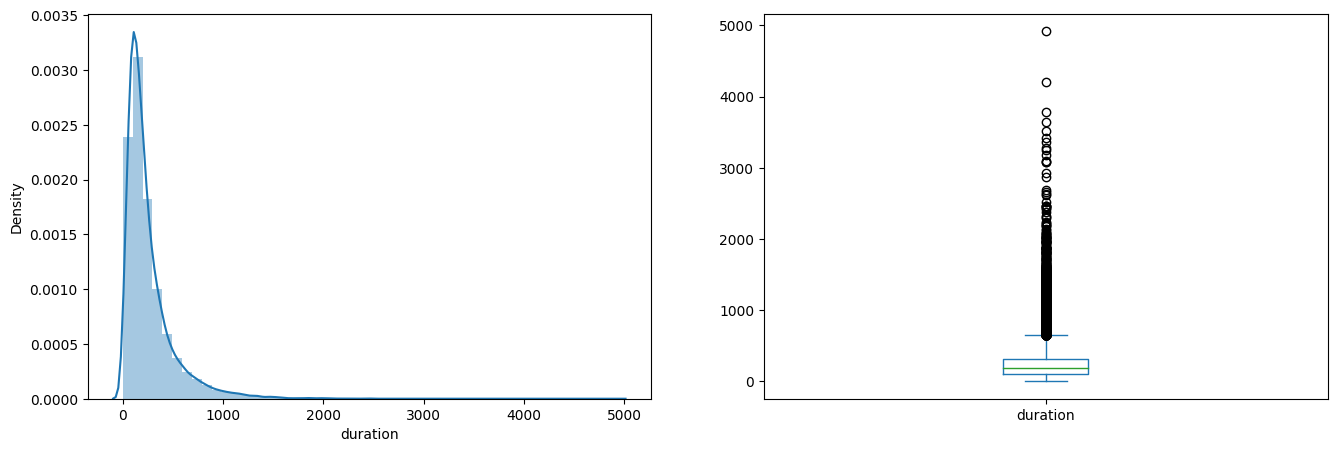

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['duration']); 
plt.subplot(122) 
df_train['duration'].plot.box(figsize=(16,5)) 
plt.show()

Call duration for most of the cold calls is between 0 to 500 seconds.(upto 2-4 minutes)

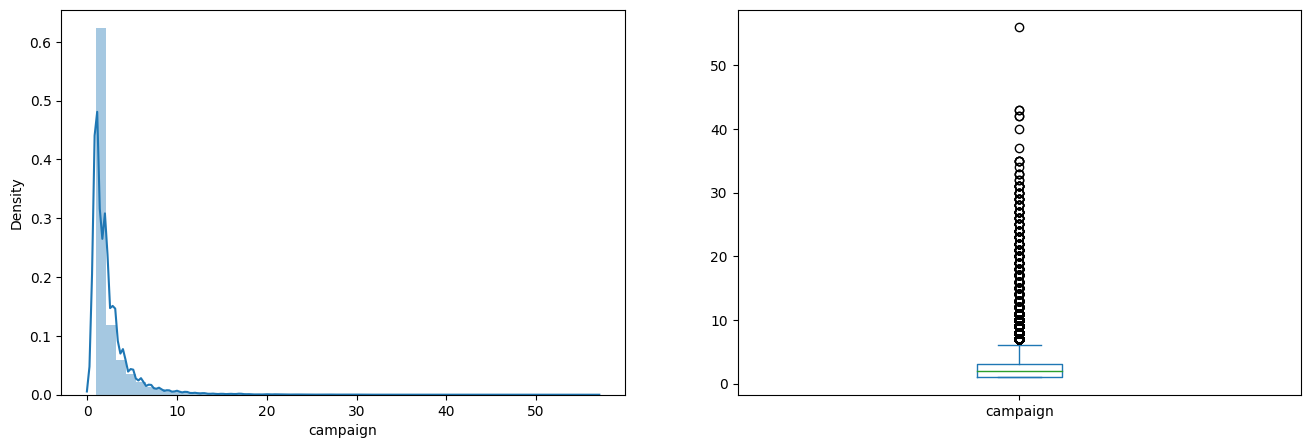

In [23]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['campaign']); 
plt.subplot(122) 
df_train['campaign'].plot.box(figsize=(16,5)) 
plt.show()

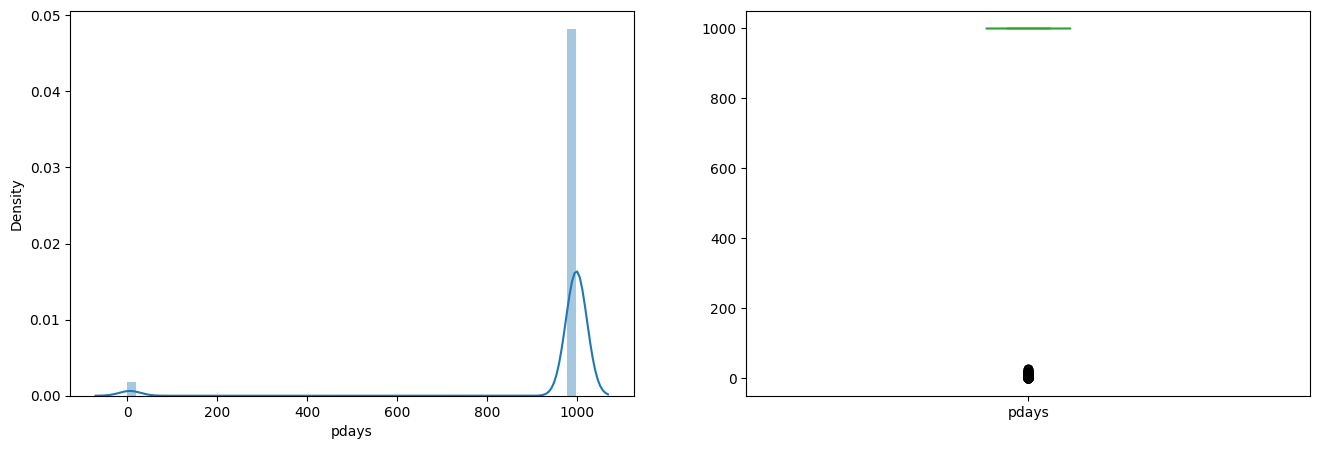

In [24]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['pdays']); 
plt.subplot(122) 
df_train['pdays'].plot.box(figsize=(16,5)) 
plt.show()

<Axes: xlabel='pdays', ylabel='contact'>

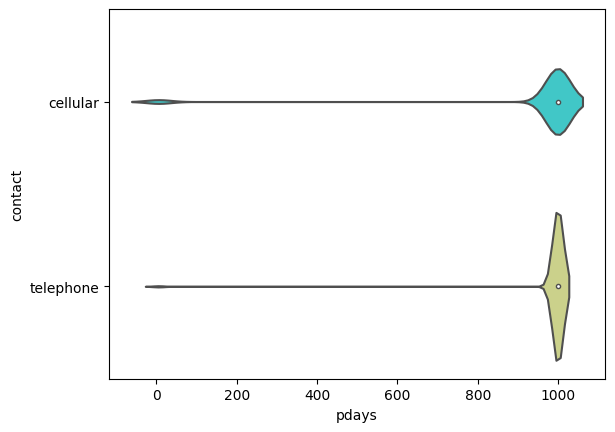

In [25]:
sns.violinplot(x="pdays", y="contact", data=df_train, palette='rainbow')

**We can see from above that there has been a huge gap in making contact with the clients or the client has not been contacted at all since the last call made.**

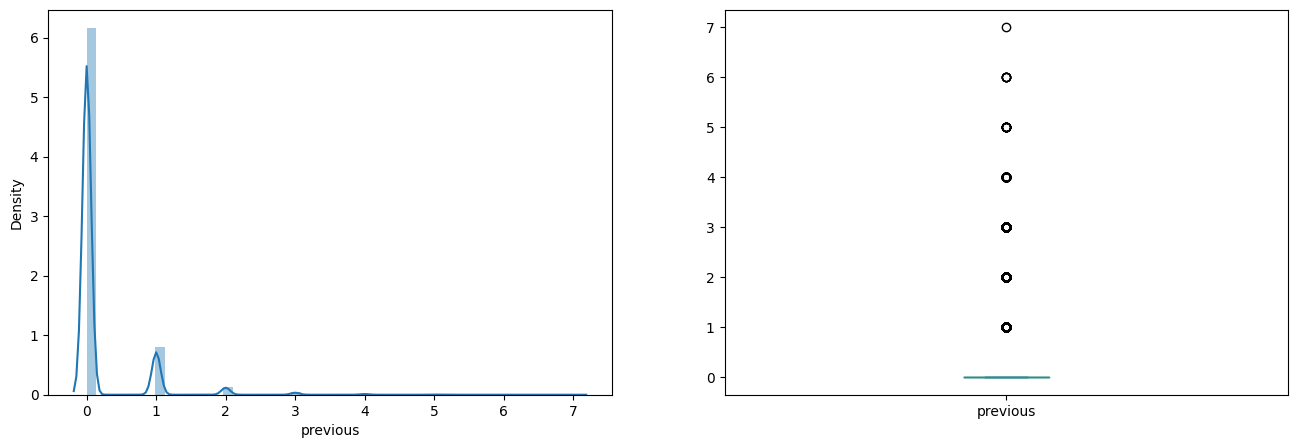

In [26]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['previous']); 
plt.subplot(122) 
df_train['previous'].plot.box(figsize=(16,5)) 
plt.show()

<Axes: xlabel='previous', ylabel='contact'>

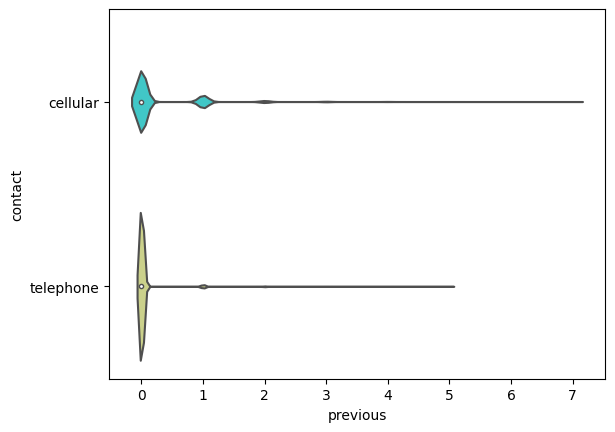

In [27]:
sns.violinplot(x="previous", y="contact", data=df_train, palette='rainbow')

**Very few clients have been informed befor this campaign or contacted only once to inform them about the campaign**

# Categorical Independent Variable v/s Target Variable

**After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable(bivariate analysis).**

<Axes: xlabel='y'>

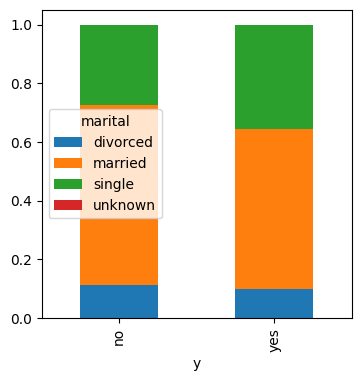

In [28]:
# ## Correlation between marital status & y (target variable)

marital_status = pd.crosstab(df_train['y'], df_train['marital'])
marital_status.div(marital_status.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))

It can be inferred that although age does not affect the target variable significantly, percentage of single applicants is slightly more than married applicants for long term saving.

**Let us visualize the remaining categorical variables vs target variable.**

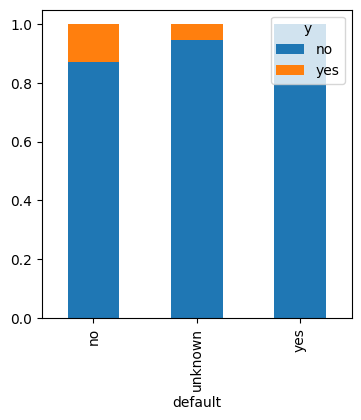

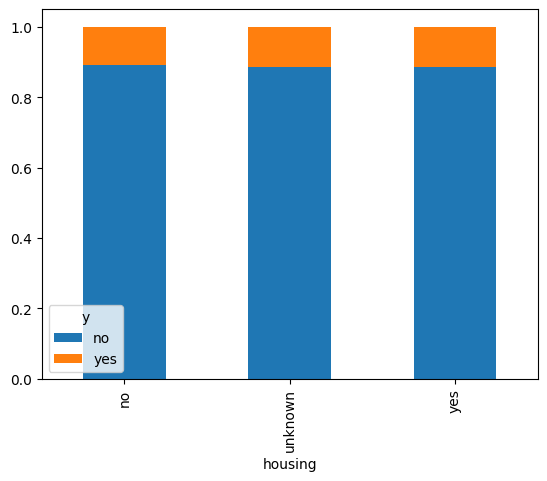

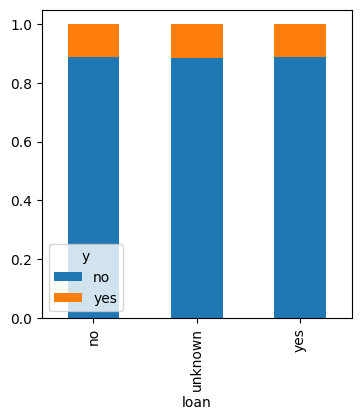

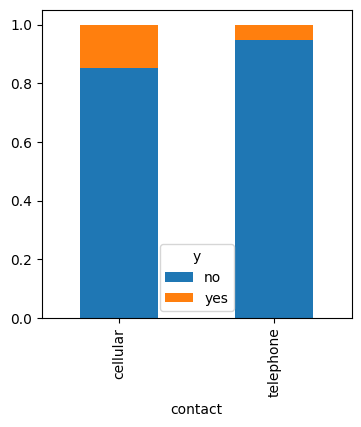

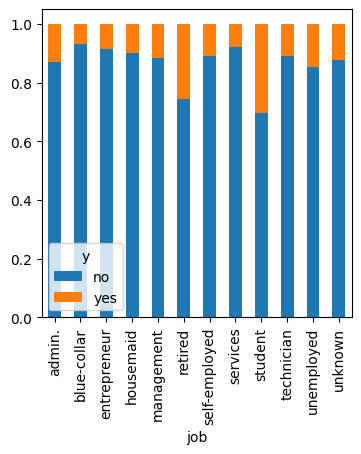

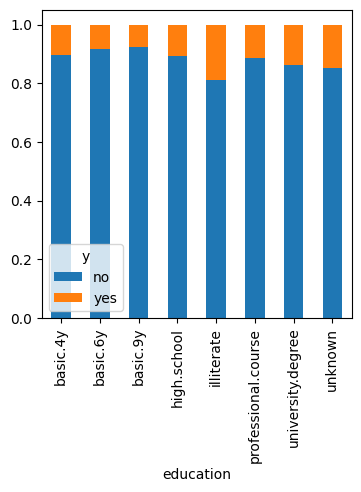

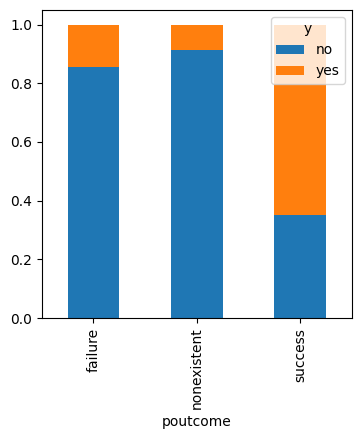

In [29]:
Defaulters=pd.crosstab(df_train['default'],df_train['y']) 
housing_loan=pd.crosstab(df_train['housing'],df_train['y']) 
loan_other=pd.crosstab(df_train['loan'],df_train['y']) 
Contacted=pd.crosstab(df_train['contact'],df_train['y'])
Job=pd.crosstab(df_train['job'],df_train['y'])
Education=pd.crosstab(df_train['education'],df_train['y'])
Campaign_out=pd.crosstab(df_train['poutcome'],df_train['y'])

Defaulters.div(Defaulters.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
housing_loan.div(housing_loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
loan_other.div(loan_other.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Contacted.div(Contacted.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Job.div(Job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Campaign_out.div(Campaign_out.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

We can infer that,

1. Loan defaulters are unlikely to select the LTSS( Long Term Saving Scheme)
2. Having housing/other loans have very little/no influence on selecting the LTSS
3. Applicants with access to cellphone are more likely to chose the LTSS due to high availability & easy access.
4. Following professionals are more likely to select the LTSS- Students, Retired, admin & unemployed
5. Illiterate tend to invest more in LTSS
6. Applicants with more reach & access (Through campaigns & calls) are more likely to chose the LTSS

**Now let's check the relation between Ordinal variables & y.**

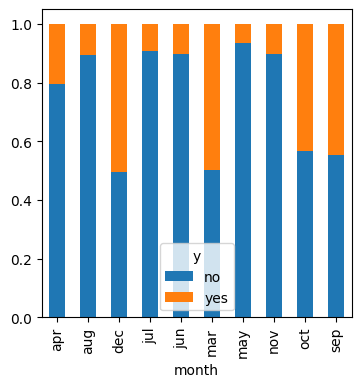

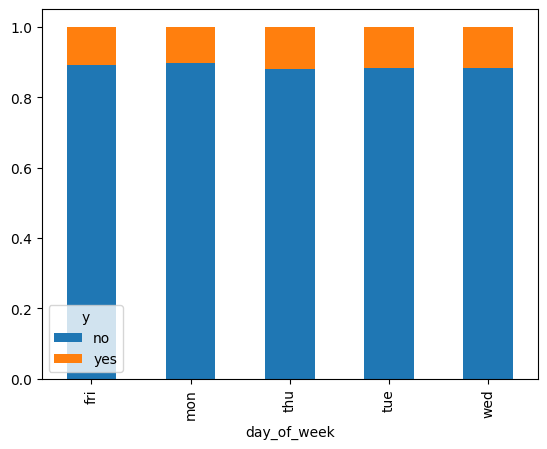

In [30]:
Month=pd.crosstab(df_train['month'],df_train['y'])
Day_of_week=pd.crosstab(df_train['day_of_week'],df_train['y'])

Month.div(Month.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Day_of_week.div(Day_of_week.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

As we can see, there's not much effect of contact being made on particular day of the week. 
However, certain months have garnered a better result as shown in figure. Thos months are- March, September, October & December.

# Numerical Independent Variable vs Target Variable

age,duration,campaign,pdays,previous

<Axes: xlabel='y'>

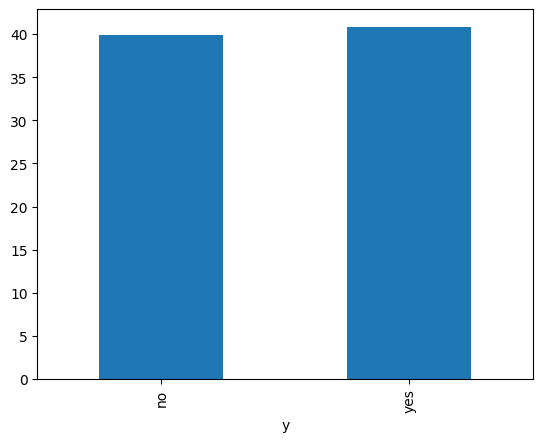

In [31]:
df_train.groupby('y')['age'].mean().plot.bar()

We don't see any variations in mean age.

We can convert the numerical nature of Age into ordinal category for better understanding by dividing the age into bins/categories

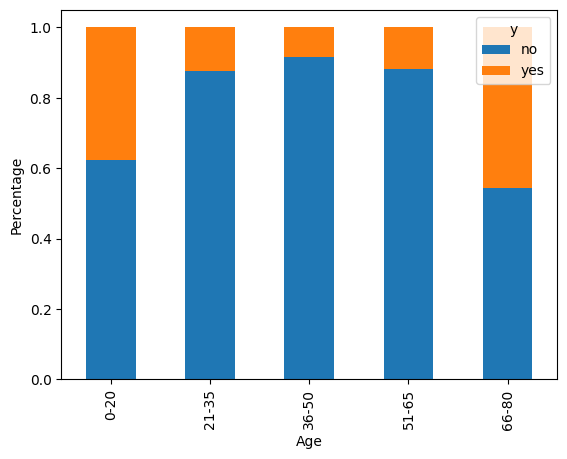

In [32]:
bins=[0,20,35,50,65,80] 
group=['0-20','21-35','36-50', '51-65', '66-80'] 
df_train['Age_bin']=pd.cut(df_train['age'],bins,labels=group)
Age_bin=pd.crosstab(df_train['Age_bin'],df_train['y']) 
Age_bin.div(Age_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Age') 
P = plt.ylabel('Percentage')

**Two age groups in particular are more inclined towards chosing LTSS- Young (upto 20 years old- mostly college going or early in career) 
 & old age people( mostly retired people)**

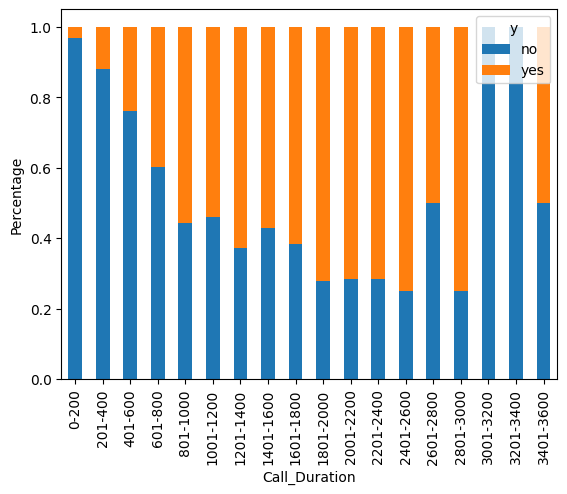

In [33]:
# Now let's see the correlation between duration of last contact & target

bins=[0,200,400,600,800,1000,1200,1400,1600,2000,2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800] 
group=['0-200','201-400','401-600','601-800','801-1000','1001-1200','1201-1400','1401-1600','1601-1800','1801-2000','2001-2200','2201-2400','2401-2600','2601-2800', "2801-3000",'3001-3200','3201-3400','3401-3600'] 
df_train['Duration_bin']=pd.cut(df_train['duration'],bins,labels=group)
Duration_bin=pd.crosstab(df_train['Duration_bin'],df_train['y']) 
Duration_bin.div(Duration_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Call_Duration') 
P = plt.ylabel('Percentage')

In [34]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Age_bin,Duration_bin
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,36-50,201-400
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,36-50,201-400
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes,66-80,1001-1200
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,36-50,0-200
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,51-65,201-400


<Axes: xlabel='y'>

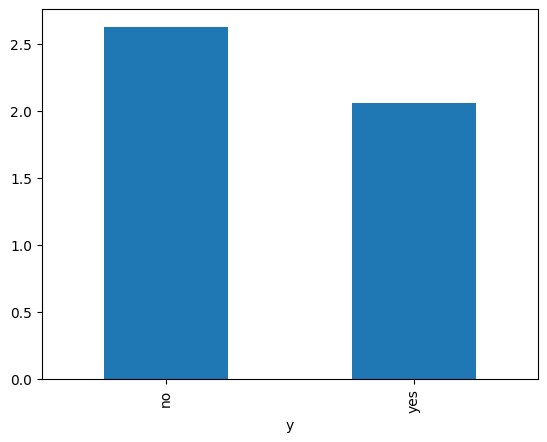

In [35]:
df_train.groupby('y')['campaign'].mean().plot.bar()

<Axes: xlabel='y'>

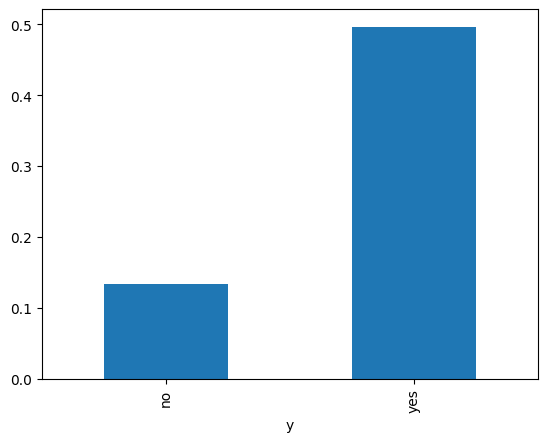

In [36]:
df_train.groupby('y')['previous'].mean().plot.bar()

In [37]:
df_train['previous'].value_counts()

previous
0    28416
1     3673
2      606
3      175
4       60
5       14
6        5
7        1
Name: count, dtype: int64

In [38]:
df_train['campaign'].value_counts()

campaign
1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: count, dtype: int64

In [39]:
df_train['campaign'].unique()

array([ 4,  2,  1,  5,  9,  3,  7,  6, 13,  8, 12, 10, 19, 11, 31, 17, 16,
       29, 43, 20, 14, 21, 35, 15, 33, 28, 22, 25, 18, 23, 27, 26, 24, 34,
       32, 37, 30, 42, 40, 56])

In [40]:
df_train['campaign_outcome'] = df_train['campaign'] + df_train['previous']

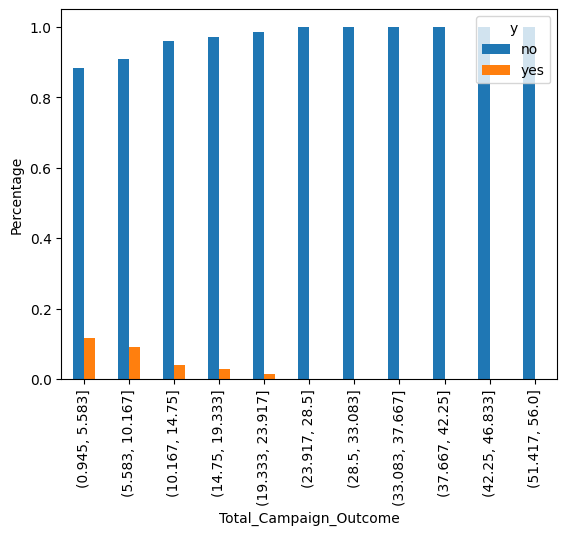

In [41]:
df_train['total_campaign_outcome'] = pd.cut(df_train['campaign_outcome'],bins= 12)

Total_campaign_bin=pd.crosstab(df_train['total_campaign_outcome'],df_train['y'])
Total_campaign_bin.div(Total_campaign_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Total_Campaign_Outcome') 
P = plt.ylabel('Percentage')

In [42]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Age_bin,Duration_bin,campaign_outcome,total_campaign_outcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,36-50,201-400,4,"(0.945, 5.583]"
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,36-50,201-400,3,"(0.945, 5.583]"
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes,66-80,1001-1200,1,"(0.945, 5.583]"
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,36-50,0-200,2,"(0.945, 5.583]"
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,51-65,201-400,2,"(0.945, 5.583]"


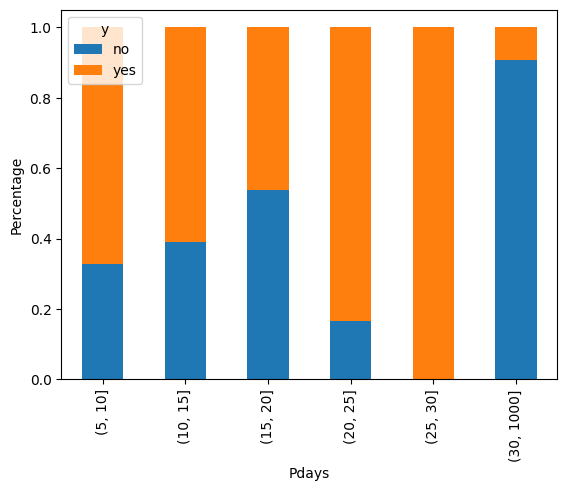

In [43]:
# bins=[0,100,20] 
# group=['Low','Average','High'] 
df_train['Pdays_bin']=pd.cut(df_train['pdays'],bins=[5,10,15,20,25,30,1000])
df_train['Pdays_bin']
Pdays_bin=pd.crosstab(df_train['Pdays_bin'],df_train['y']) 
Pdays_bin.div(Pdays_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Pdays') 
P = plt.ylabel('Percentage')

In [44]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,y,Age_bin,Duration_bin,campaign_outcome,total_campaign_outcome,Pdays_bin
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,...,4,999,0,nonexistent,no,36-50,201-400,4,"(0.945, 5.583]","(30, 1000]"
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,...,2,999,1,failure,no,36-50,201-400,3,"(0.945, 5.583]","(30, 1000]"
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,...,1,999,0,nonexistent,yes,66-80,1001-1200,1,"(0.945, 5.583]","(30, 1000]"
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,2,999,0,nonexistent,no,36-50,0-200,2,"(0.945, 5.583]","(30, 1000]"
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,...,2,999,0,nonexistent,no,51-65,201-400,2,"(0.945, 5.583]","(30, 1000]"


In [45]:
df_train = df_train.drop(['Age_bin', 'Duration_bin', 'campaign_outcome', 'total_campaign_outcome', 'Pdays_bin'], axis= 1)

In [46]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [47]:
df_train['pdays'].unique()

array([999,   3,   6,  10,   8,   4,   9,  11,   7,  12,   5,   2,  22,
        25,  15,  17,   0,  14,  13,   1,  16,  18,  19,  21,  20,  27,
        26])

In [48]:
for column in df_train:
    mode= df_train[column].mode()[0]
    df_train[column]= df_train[column].replace("unknown", mode)

In [49]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


**Converting the categorical values into numerical ones for model building by label encoding**

In [50]:
from sklearn.preprocessing import LabelEncoder

df_train_enc = df_train.copy()
for col in df_train.columns:
    lb = LabelEncoder()
    df_train_enc[col] = lb.fit_transform(df_train[col].values)
    
df_train_enc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,32,1,1,2,0,0,0,0,7,4,227,3,26,0,1,0
1,20,2,1,6,0,0,0,1,7,4,202,1,26,1,0,0
2,61,5,1,0,0,0,0,0,3,1,1121,0,26,0,1,1
3,19,0,1,6,0,1,0,1,6,1,120,1,26,0,1,0
4,42,5,0,6,0,0,0,0,4,3,368,1,26,0,1,0


In [51]:
from sklearn.preprocessing import LabelEncoder

df_test_enc = df_test.copy()
for col in df_test.columns:
    lb = LabelEncoder()
    df_test_enc[col] = lb.fit_transform(df_test[col].values)
    
df_test_enc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,6,4,0,6,0,0,0,0,3,3,95,4,1
1,11,10,3,6,0,0,0,0,4,3,64,0,1
2,29,5,0,5,1,2,0,0,3,2,95,1,1
3,18,2,1,0,1,0,0,1,4,3,12,1,1
4,2,0,2,3,0,0,0,0,5,0,108,1,1


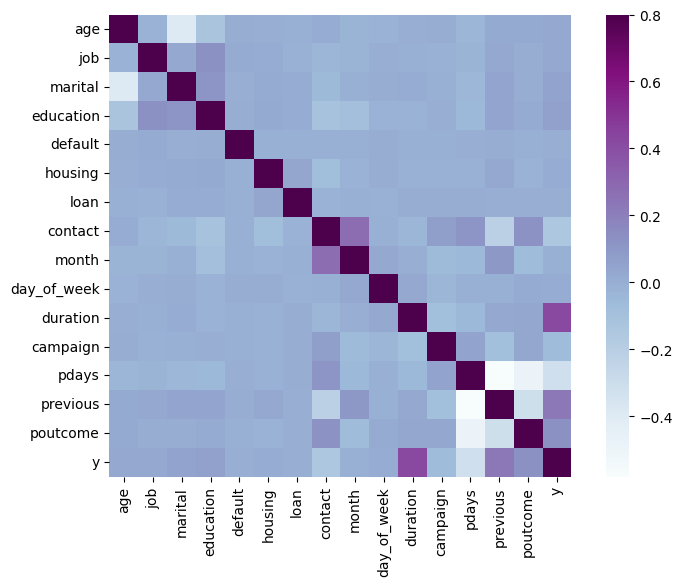

In [52]:
matrix = df_train_enc.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Outlier Treatment

<Axes: xlabel='age'>

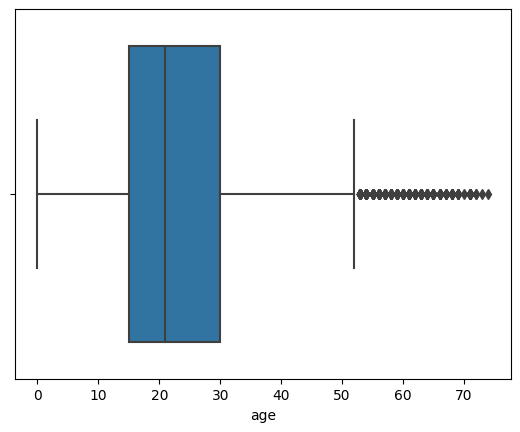

In [53]:
sns.boxplot(data = df_train_enc, x= 'age')

In [54]:
# # Removing the outlier

# Q1 = df_train_enc['age'].quantile(0.25)
# Q3 = df_train_enc['age'].quantile(0.75)

# IQR = Q3-Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df_train_enc_no_outlier = np.where(df_train_enc['age'] < lower_bound, lower_bound, np.where(df_train_enc['age'] > upper_bound, upper_bound, df_train_enc['age']))

In [55]:
# sns.boxplot(x = df_train_enc_no_outlier)

<Axes: xlabel='duration'>

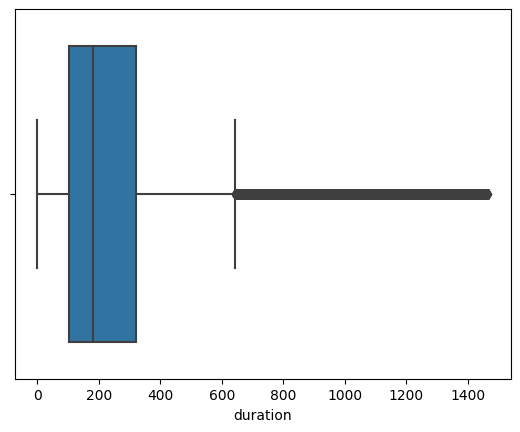

In [56]:
# For 'duration' variable

sns.boxplot(data = df_train_enc, x= 'duration')

In [57]:
# Removing the outlier

def remove_outliers(col):
    Q1 = df_train_enc[col].quantile(0.25)
    Q3 = df_train_enc[col].quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return np.where(df_train_enc[col] < lower_bound, lower_bound, np.where(df_train_enc[col] > upper_bound, upper_bound, df_train_enc[col]))

In [58]:
df_train_enc.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='campaign'>

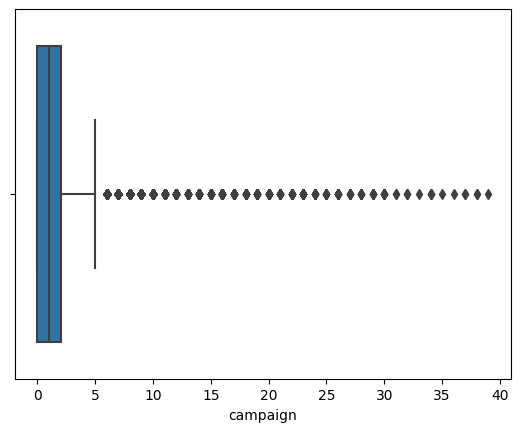

In [59]:
# For 'campaign' variable

sns.boxplot(data = df_train_enc, x= 'campaign')

In [60]:
for col in ['age', 'duration', 'campaign', 'pdays', 'previous']:
    df_train_enc[col] = remove_outliers(col)

In [61]:
df_train_enc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,32.0,1,1,2,0,0,0,0,7,4,227.0,3.0,26.0,0.0,1,0
1,20.0,2,1,6,0,0,0,1,7,4,202.0,1.0,26.0,0.0,0,0
2,52.5,5,1,0,0,0,0,0,3,1,643.0,0.0,26.0,0.0,1,1
3,19.0,0,1,6,0,1,0,1,6,1,120.0,1.0,26.0,0.0,1,0
4,42.0,5,0,6,0,0,0,0,4,3,368.0,1.0,26.0,0.0,1,0


In [62]:
df_train_enc.drop(columns=["pdays", "previous"], axis=1, inplace=True)

In [78]:
X = df_train_enc.drop('y', axis = 1)
y = df_train_enc['y']

In [83]:
X=pd.get_dummies(X) 
train=pd.get_dummies(df_train_enc) 
test=pd.get_dummies(df_test)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
pred_cv = model.predict(X_cv)
accuracy_score(y_cv, pred_cv)

0.883763277693475

In [67]:
df_train_enc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,32.0,1,1,2,0,0,0,0,7,4,227.0,3.0,1,0
1,20.0,2,1,6,0,0,0,1,7,4,202.0,1.0,0,0
2,52.5,5,1,0,0,0,0,0,3,1,643.0,0.0,1,1
3,19.0,0,1,6,0,1,0,1,6,1,120.0,1.0,1,0
4,42.0,5,0,6,0,0,0,0,4,3,368.0,1.0,1,0


In [73]:
df_train_enc.shape, df_test.shape

((32950, 14), (8238, 13))

In [87]:
pred_test = model.predict(test)

In [88]:
from sklearn.model_selection import StratifiedKFold

In [89]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8861911987860395

2 of kfold 5
accuracy_score 0.8860394537177542

3 of kfold 5
accuracy_score 0.8899848254931715

4 of kfold 5
accuracy_score 0.8880121396054628

5 of kfold 5
accuracy_score 0.8852807283763278


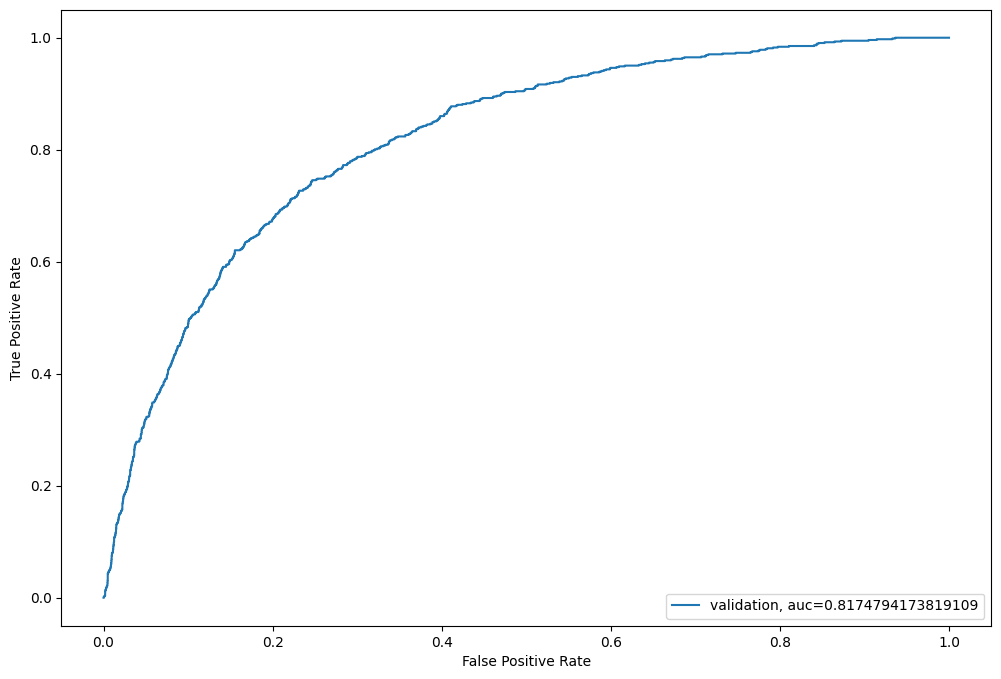

In [90]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [91]:
from sklearn import tree

In [92]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8682852807283763

2 of kfold 5
accuracy_score 0.8707132018209408

3 of kfold 5
accuracy_score 0.8725341426403642

4 of kfold 5
accuracy_score 0.8717754172989378

5 of kfold 5
accuracy_score 0.870257966616085


In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.9059180576631259

2 of kfold 5
accuracy_score 0.9040971168437025

3 of kfold 5
accuracy_score 0.9042488619119878

4 of kfold 5
accuracy_score 0.9018209408194233

5 of kfold 5
accuracy_score 0.9012139605462822


In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [97]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [98]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [99]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [100]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=13, n_estimators=101, random_state=1)

In [101]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.891350531107739

2 of kfold 5
accuracy_score 0.8922610015174507

3 of kfold 5
accuracy_score 0.8908952959028832

4 of kfold 5
accuracy_score 0.8898330804248862

5 of kfold 5
accuracy_score 0.8911987860394537


In [102]:
from xgboost import XGBClassifier

In [103]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]


6 of kfold 5
accuracy_score 0.9057663125948406

7 of kfold 5
accuracy_score 0.9056145675265553

8 of kfold 5
accuracy_score 0.9074355083459787

9 of kfold 5
accuracy_score 0.9077389984825494

10 of kfold 5
accuracy_score 0.9056145675265553
